In [7]:
import matplotlib.pyplot as plt
import numpy as np

Rs = [1000, 10000, 100000]
np.random.seed(0)
sigmas_q = np.linspace(0.1, 1.5, 50)
sigma_p = 1
# set up arrays
Zs = [[] for _ in range(len(sigmas_q))]
variances = [[] for _ in range(len(sigmas_q))]
Ws = [[] for _ in range(len(sigmas_q))]
th_variance = [[] for _ in range(len(sigmas_q))]
th_variance = []


In [8]:
# Sample x_i from Q(x)
x_initial = np.random.normal(0, 1, max(Rs))


for i, sigma_q in enumerate(sigmas_q):
    for R in Rs:

        x = x_initial * sigma_q

        # Compute P(x) and Q(x)
        P_xi = (1 / np.sqrt(2 * np.pi * sigma_p ** 2)) * np.exp(-x[:R] ** 2 / (2 * sigma_p ** 2))
        Q_xi = (1 / np.sqrt(2 * np.pi * sigma_q ** 2)) * np.exp(-x[:R] ** 2 / (2 * sigma_q ** 2))

        # Compute weights w_i
        w_i = P_xi / Q_xi

        Ws[i].append(w_i[:1000])

        # Estimate Z
        Z = np.mean(w_i)
        Zs[i].append(Z)

        # estimate variance
        std = np.std(w_i)
        variances[i].append(std)

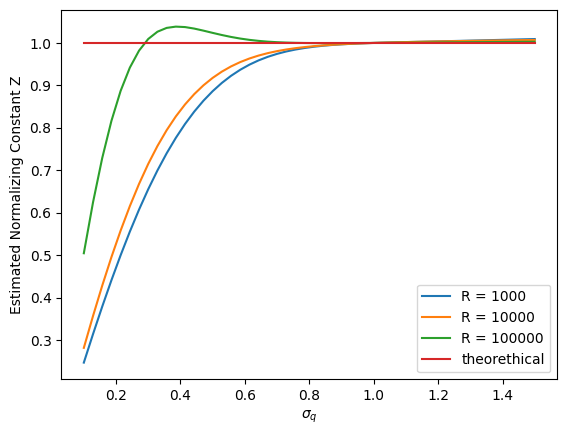

In [9]:


Zs = np.array(Zs)
variances = np.array(variances)
Ws = np.array(Ws)

# Plotting part
plt.figure()
for idx, R in enumerate(Rs):
    plt.plot(sigmas_q, Zs[:, idx], label=f'R = {R}')
plt.plot(sigmas_q, 1*np.ones(len(sigmas_q)), label='theorethical')
plt.xlabel('$\sigma_q$')
plt.ylabel('Estimated Normalizing Constant Z')
plt.legend()
plt.show()



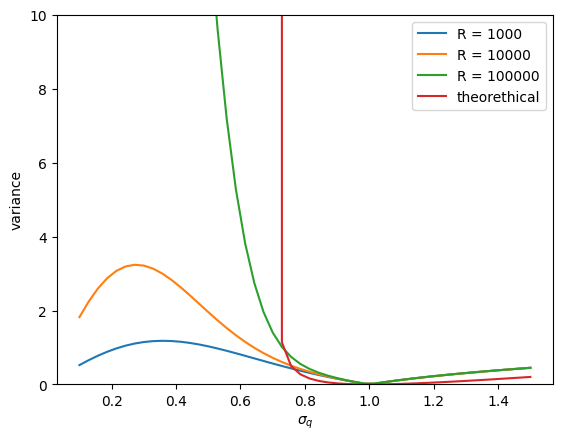

In [10]:

# theoretical variance
for sigma_q in sigmas_q:
    if sigma_q**2 > 1/2 * sigma_p**2:
        term_one = 2 * (sigma_q ** 2)
        term_two = sigma_p ** 2
        var = ((sigma_q**2) / (sigma_p * ((term_one - term_two)**(1/2)))) - 1
        th_variance.append(var)

    else:
        var = 1e20
        th_variance.append(var)



plt.figure()
for idx, R in enumerate(Rs):
    plt.plot(sigmas_q, variances[:, idx], label=f'R = {R}')
plt.plot(sigmas_q, th_variance, label='theorethical')
plt.xlabel('$\sigma_q$')
plt.ylabel('variance')
plt.ylim(0, 10)
plt.legend()
plt.show()


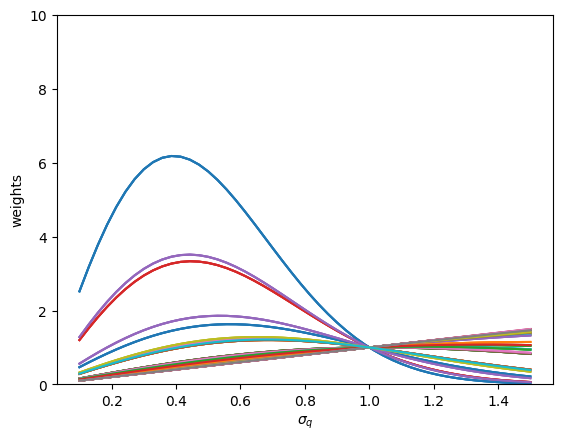

In [12]:
plt.figure()
for idx, R in enumerate(Rs):
    plt.plot(sigmas_q, Ws[:, idx, 0:30])

plt.ylim(0, 10)
plt.xlabel('$\sigma_q$')
plt.ylabel('weights')

plt.show()
plt.show()